<a href="https://colab.research.google.com/github/yushi02/Resume_Screening/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/UpdatedResumeDataSet.csv")

In [ ]:
df.shape

(962, 2)

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


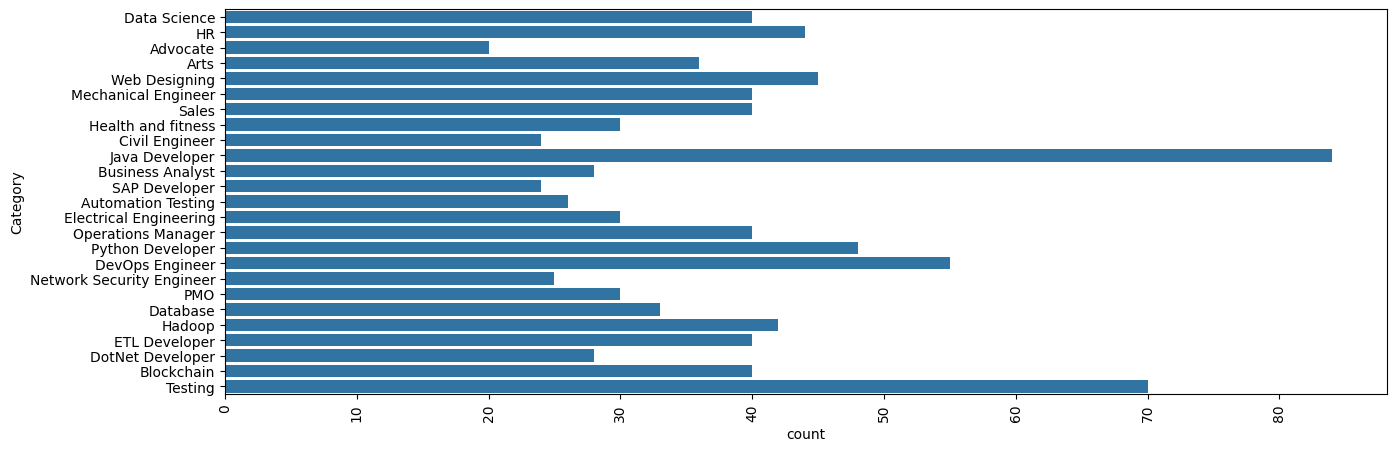

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

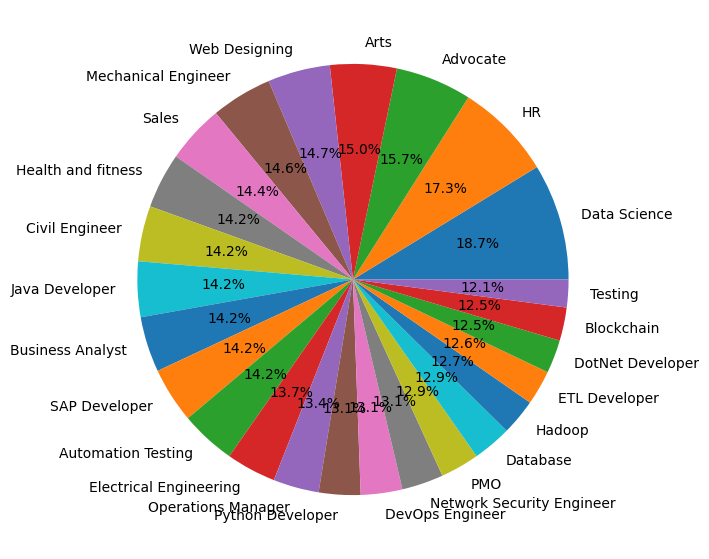

In [ ]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(17,7))
plt.pie(counts,labels=labels,autopct='1%.1f%%')
plt.show()

In [ ]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:

import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [ ]:
df['Resume']=df['Resume'].apply(lambda x:cleanResume(x))
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])
le.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(stop_words='english')
tfid.fit(df['Resume'])
Req_Txt=tfid.transform(df['Resume'])


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Req_Txt,df['Category'],test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((769, 7351), (193, 7351))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


In [16]:
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9844559585492227

In [18]:
import pickle
pickle.dump(tfid,open('tfid.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))


In [19]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [20]:
import pickle

clf=pickle.load(open('/content/clf.pkl','rb'))

clean_resume=cleanResume(myresume)

input_features=tfid.transform([clean_resume])

prediction_id=clf.predict(input_features)[0]

category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6


In [21]:
! pip install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 117.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00


In [22]:
!wget -q -O - ipv4.icanhazip.com


34.143.230.56


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.230.56:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) y
your url is: https://loud-falcons-nail.loca.lt
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
2024-09-05 13:47:49.749 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 590, in code_to_exec
    exec(code, module.__dict__)
  File "/content/app.py", line 10, in <module>
    clf = pickle.load(open('/contebt/c